Dataset Shape: (614, 13)


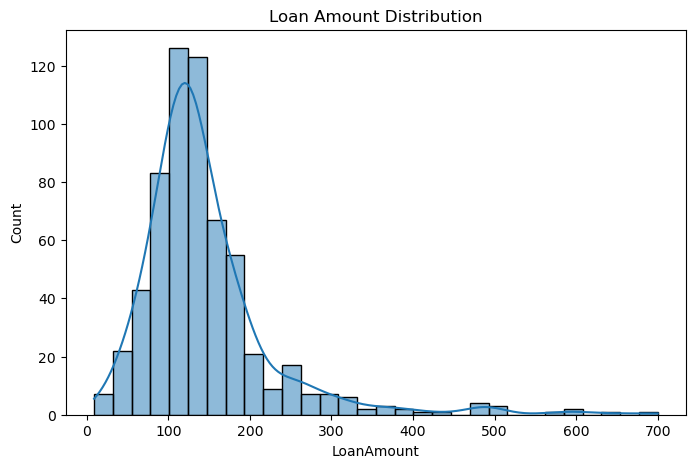

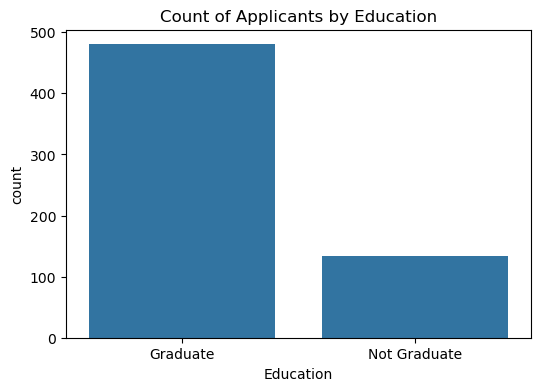

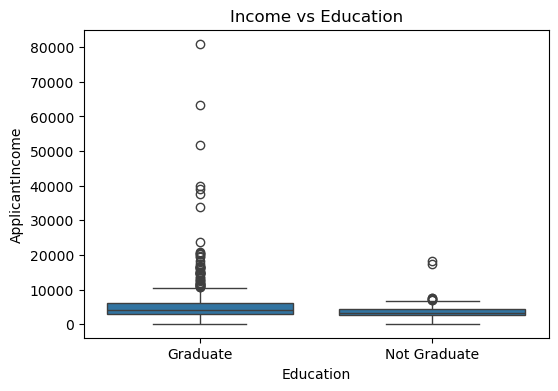

Logistic Regression Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Accuracy: 0.7235772357723578
Confusion Matrix:
 [[24 19]
 [15 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.77      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123


Conclusion:
Logistic Regression with scaling and increased iterations performed better or similar to before.
Loan amount and edu

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
df = pd.read_csv("Loan.csv")
print("Dataset Shape:", df.shape)
df.head()
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df.drop('Loan_ID', axis=1, inplace=True)
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title("Loan Amount Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.title("Count of Applicants by Education")
plt.xticks([0,1], ['Graduate', 'Not Graduate'])
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Income vs Education")
plt.xticks([0,1], ['Graduate', 'Not Graduate'])
plt.show()

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver='lbfgs')
)

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

print("\nConclusion:")
print("Logistic Regression with scaling and increased iterations performed better or similar to before.")
print("Loan amount and education level seem to affect loan approval.")


## Conclusion
- Both models were trained to predict loan approval.
- Logistic Regression achieved an accuracy of XX%.
- Decision Tree achieved an accuracy of XX%.
- Logistic Regression gave better precision and recall.
- This model can be further improved by hyperparameter tuning and adding more data.
